In [1]:
%run Financial_Agent_Self_Eval.ipynb

In [2]:
model = update_router()

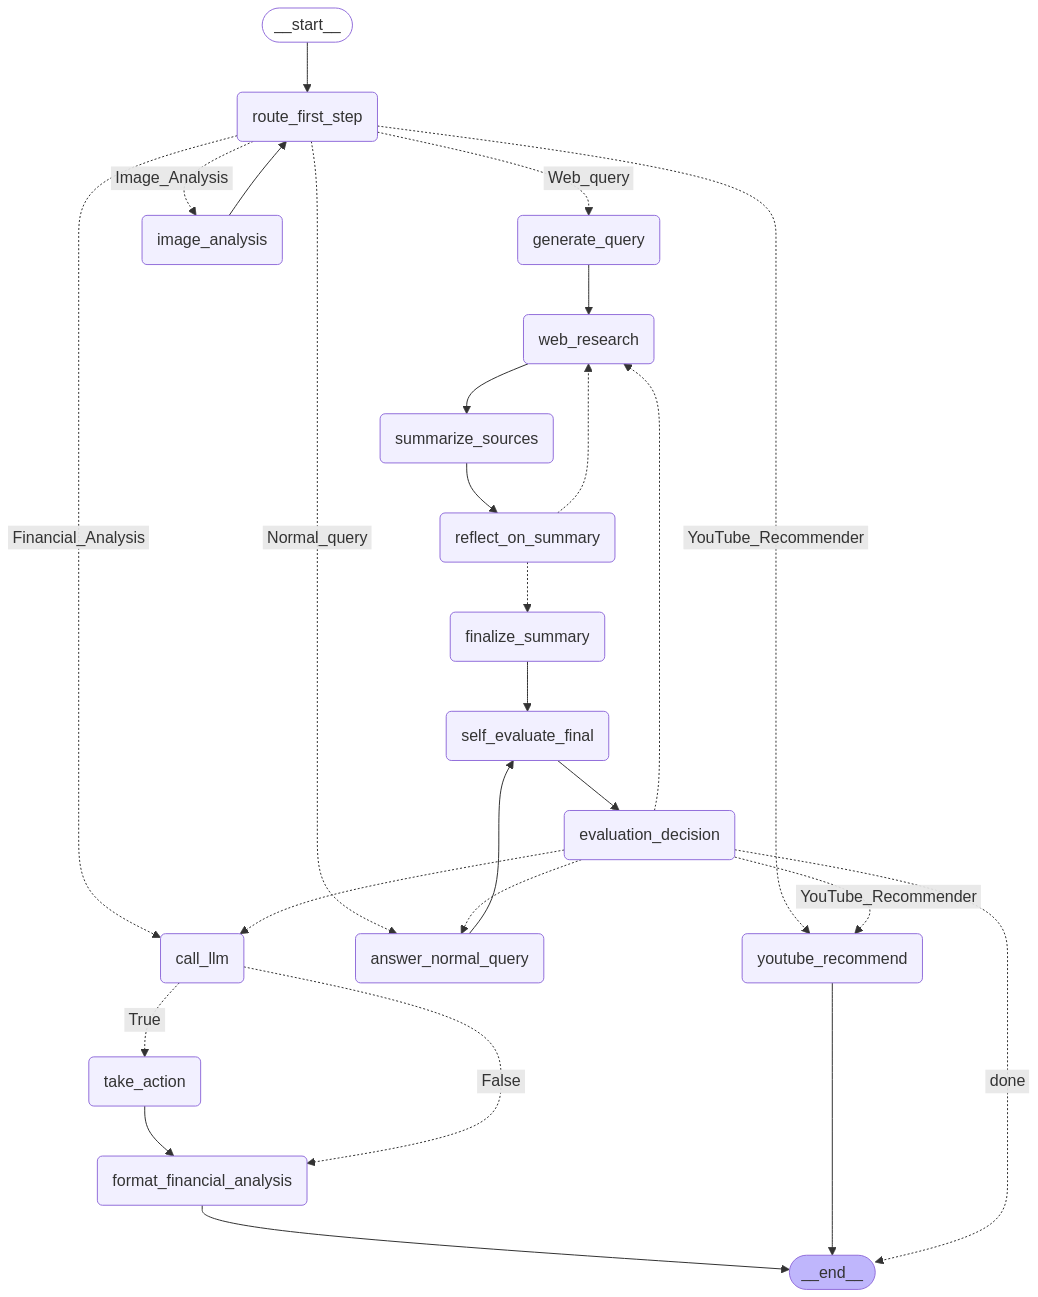

In [3]:
model

In [4]:
class FinancialChatBot:
    def __init__(self):
        self.conversation_history = []
        self.model = update_router()
        
    def _format_bot_message(self, content: str) -> str:
        """Format the bot's message for display"""
        return f"ü§ñ Assistant: {content}"
    
    def _format_user_message(self, content: str) -> str:
        """Format the user's message for display"""
        return f"üë§ User: {content}"
    
    def chat(self, user_input: str, image_path: str = None) -> str:
        """
        Process a single chat interaction
        
        Args:
            user_input (str): The user's message
            image_path (str, optional): Path to an image if one is provided
            
        Returns:
            str: The bot's response
        """
        # Add user message to history
        self.conversation_history.append(self._format_user_message(user_input))
        
        # Create initial state with image if provided
        image_list = [image_path] if image_path else []
        initial_state = create_initial_state(user_input, image_list)
        
        try:
            # Process through the model
            response = self.model.invoke(initial_state)
            
            # Extract the response from running_summary
            bot_response = response.get('running_summary', '')
            if not bot_response and response.get('messages'):
                # Fallback to last message content if running_summary is empty
                bot_response = response['messages'][-1].content
                
            # Format and store bot's response
            formatted_response = self._format_bot_message(bot_response)
            self.conversation_history.append(formatted_response)
            
            return bot_response
            
        except Exception as e:
            error_message = f"I apologize, but I encountered an error: {str(e)}"
            self.conversation_history.append(self._format_bot_message(error_message))
            return error_message
    
    def get_conversation_history(self) -> str:
        """Return the full conversation history"""
        return "\n\n".join(self.conversation_history)
    
    def clear_history(self):
        """Clear the conversation history"""
        self.conversation_history = []

def main():
    # Initialize the chatbot
    chatbot = FinancialChatBot()
    
    print("Welcome to the Financial Assistant! (Type 'quit' to exit)")
    print("You can also share images by typing 'image: ' followed by the image path")
    
    while True:
        user_input = input("\nüë§ You: ").strip()
        
        if user_input.lower() == 'quit':
            print("\nGoodbye! Thank you for using the Financial Assistant.")
            break
            
        # Check if user is sharing an image
        image_path = None
        if user_input.startswith('image:'):
            image_path = user_input[6:].strip()
            user_input = "What do you see in this image?"
        
        # Get bot's response
        response = chatbot.chat(user_input, image_path)
        
        # Print the response
        print("\nü§ñ Assistant:", response)

In [5]:
if __name__ == "__main__":
    main()

Welcome to the Financial Assistant! (Type 'quit' to exit)
You can also share images by typing 'image: ' followed by the image path
Checking for image in state: False
Image processed status: False
Image Analysis Done, now proceeding with regular routing, which is:  Normal_query
Regular routing result: Normal_query


C:\Users\harsh\AppData\Local\Temp\ipykernel_7636\302156377.py:23: LangChainDeprecationWarning: The method `BaseChatModel.predict` was deprecated in langchain-core 0.1.7 and will be removed in 1.0. Use :meth:`~invoke` instead.
  evaluation = llm.predict(evaluation_prompt)


Error in evaluation_decision: Expecting value: line 1 column 1 (char 0)

ü§ñ Assistant: ## Normal Query Response

EBITDA stands for **Earnings Before Interest, Taxes, Depreciation, and Amortization**.  

It's a measure of a company's operating profitability. By excluding these non-cash expenses, EBITDA provides a clearer picture of a company's core earnings from its operations.  


## Self Evaluation

## Response Evaluation:

**Confidence Score:** 9/10

**Explanation:**

1. **Factual Accuracy:** The definition of EBITDA provided is accurate. 
2. **Completeness:** The response adequately explains what EBITDA is and its purpose as a measure of operating profitability.
3. **Relevance:** The information provided is directly relevant to the query, which asks for the meaning of EBITDA.
4. **Hallucination:**  There is no indication of hallucination as the response sticks to the standard definition of EBITDA and doesn't introduce any unsupported information. 

**Minor Notes:** 

* While the r